In [20]:
import warnings
warnings.simplefilter('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn

font = {
    'weight' : 'bold',
    'size'   : 22}

matplotlib.rc('font', **font)

# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20) 

import pandas as pd
import numpy as np

%matplotlib inline

In [15]:
!grep . /sys/devices/system/cpu/cpu0/cache/index*/*

/sys/devices/system/cpu/cpu0/cache/index0/coherency_line_size:64
/sys/devices/system/cpu/cpu0/cache/index0/id:0
/sys/devices/system/cpu/cpu0/cache/index0/level:1
/sys/devices/system/cpu/cpu0/cache/index0/number_of_sets:64
/sys/devices/system/cpu/cpu0/cache/index0/physical_line_partition:1
grep: /sys/devices/system/cpu/cpu0/cache/index0/power: Is a directory
/sys/devices/system/cpu/cpu0/cache/index0/shared_cpu_list:0-1
/sys/devices/system/cpu/cpu0/cache/index0/shared_cpu_map:03
/sys/devices/system/cpu/cpu0/cache/index0/size:32K
/sys/devices/system/cpu/cpu0/cache/index0/type:Data
/sys/devices/system/cpu/cpu0/cache/index0/ways_of_associativity:8
/sys/devices/system/cpu/cpu0/cache/index1/coherency_line_size:64
/sys/devices/system/cpu/cpu0/cache/index1/id:0
/sys/devices/system/cpu/cpu0/cache/index1/level:1
/sys/devices/system/cpu/cpu0/cache/index1/number_of_sets:64
/sys/devices/system/cpu/cpu0/cache/index1/physical_line_partition:1
grep: /sys/devices/system/cpu/cpu0/cache/index1/power: Is a

In [10]:
df = pd.read_csv('result1.csv', sep=';', header=None)
df.columns = ['N', 'Simple', 'Block', 'Swapped']
df.set_index('N', inplace=True)
df.head()

,Simple,Block,Swapped
N,,,
1000,1.72840,1.48813,0.778102
1001,2.89788,1.64348,0.764704
1002,2.12263,1.60359,0.767570
1003,2.81566,1.55550,0.778005
1004,1.91176,1.56713,0.792450


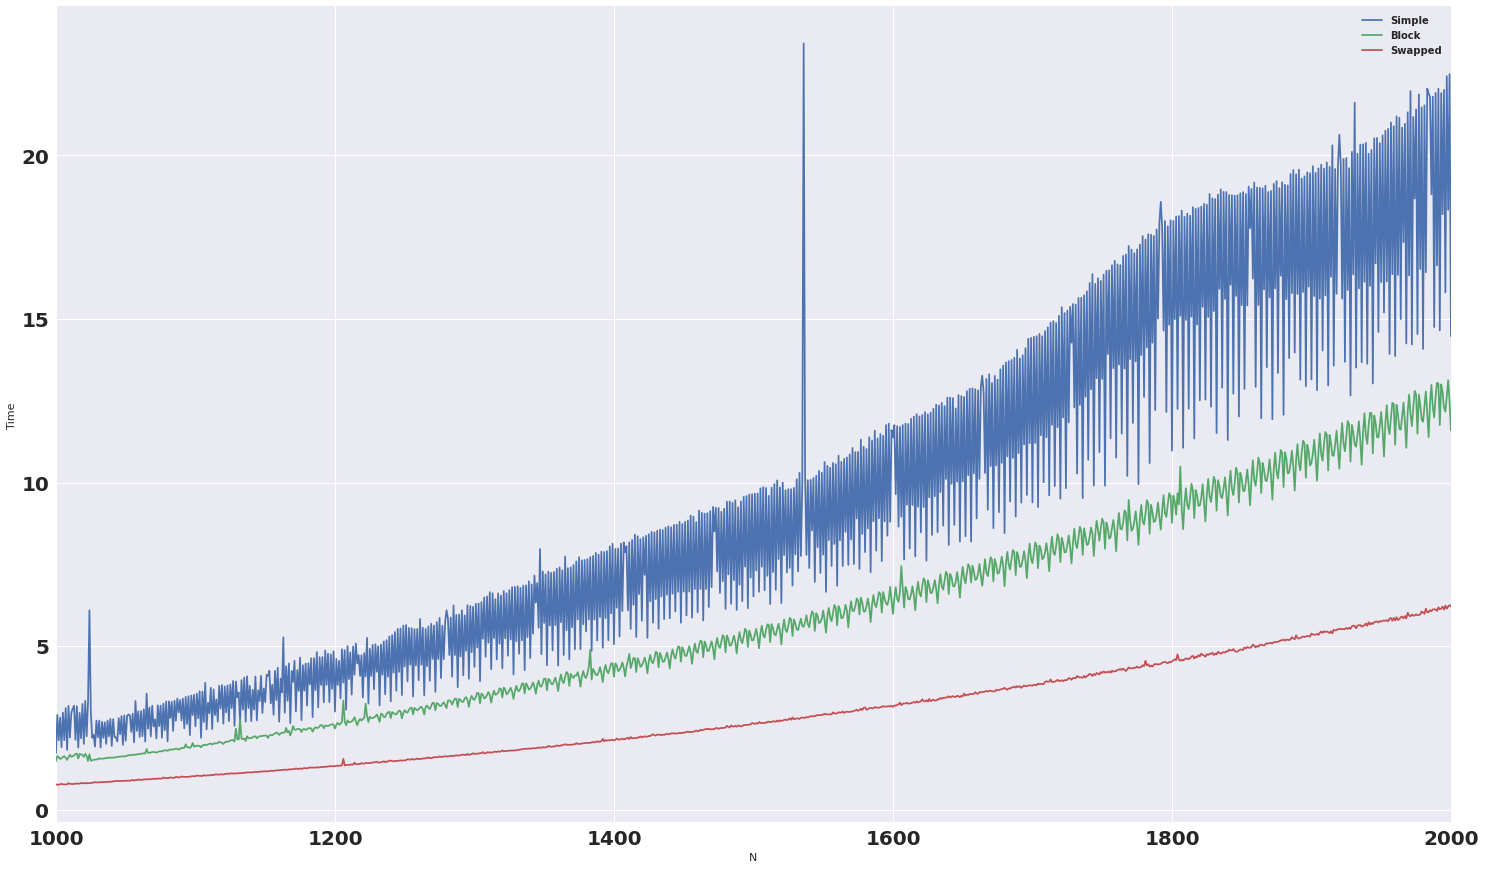

In [21]:
_, ax = plt.subplots(figsize=(25, 15))
df.plot(ax=ax)
ax.set_xlabel('N')
ax.set_ylabel('Time')

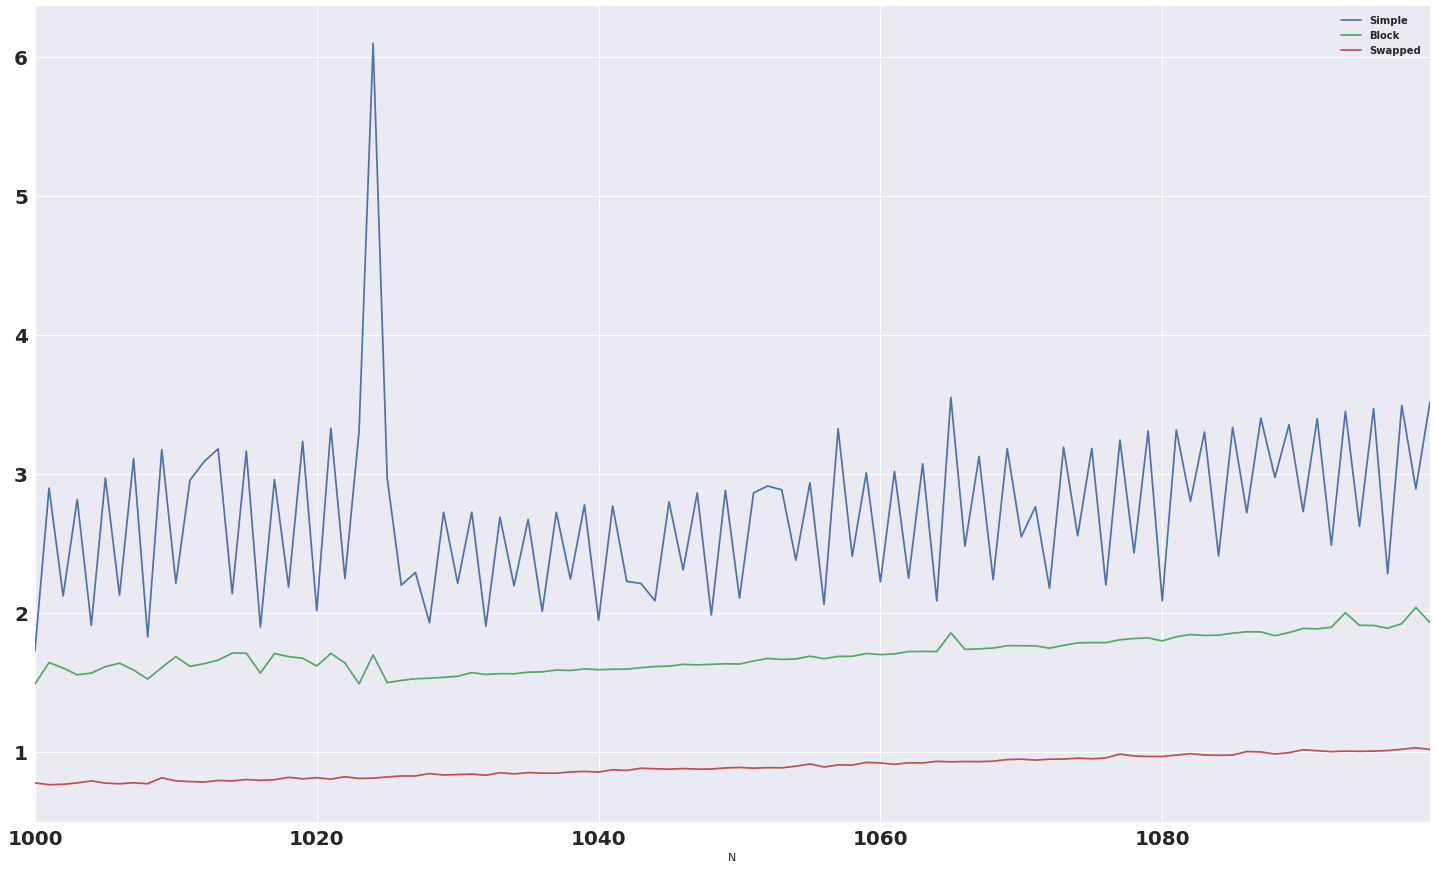

In [22]:
_, ax = plt.subplots(figsize=(25, 15))
df[:100].plot(ax=ax)

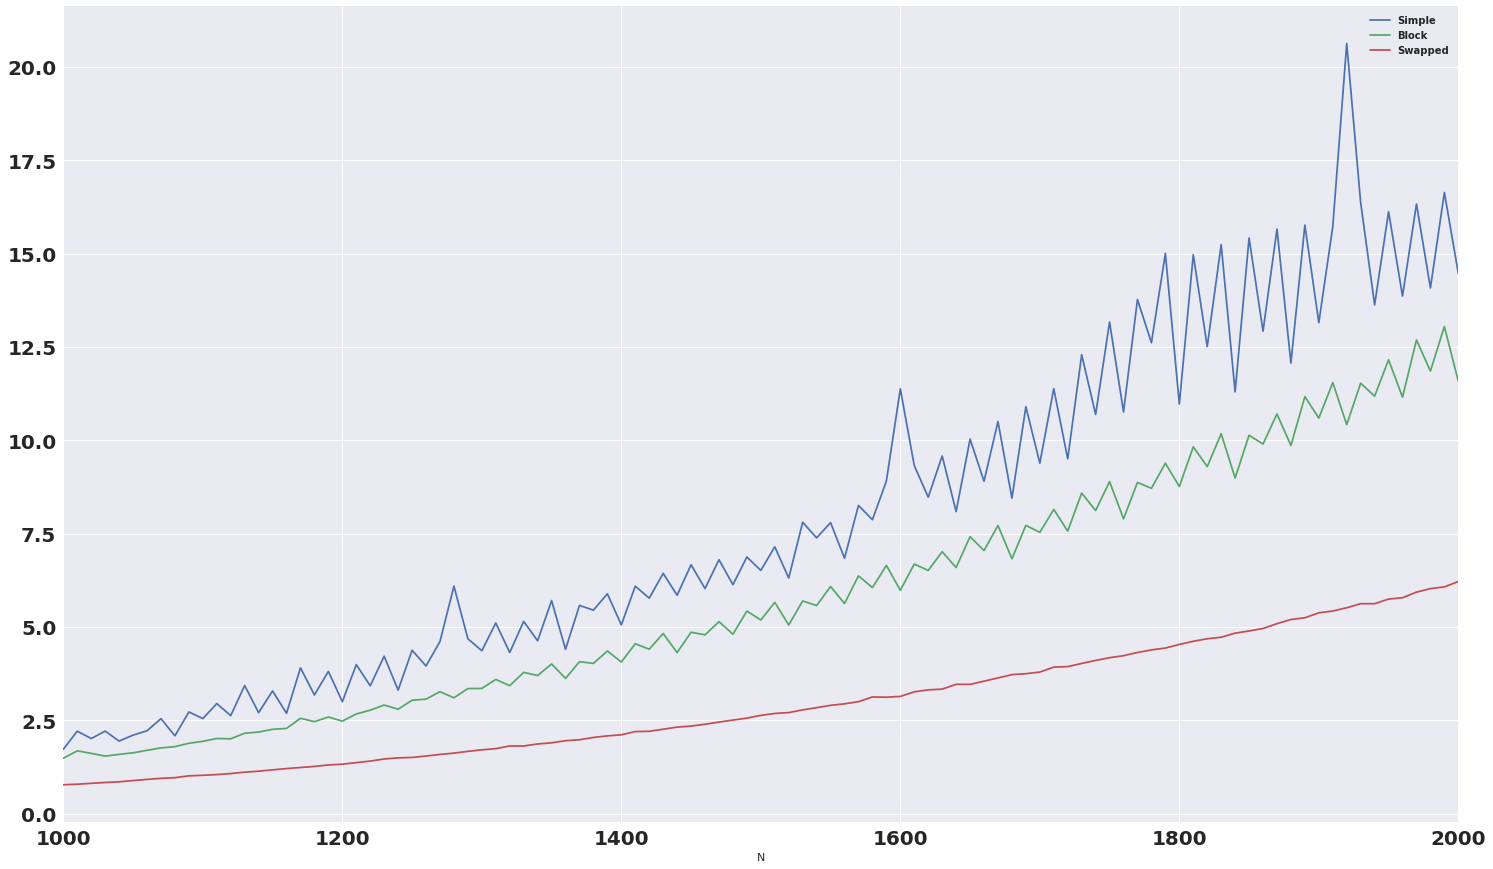

In [23]:
_, ax = plt.subplots(figsize=(25, 15))
df[::10].plot(ax=ax)